# Read the Excel file

In [1]:
import os
import pandas as pd

local_path = os.path.abspath(os.path.join(os.sep, 'Users', 'gkreftin', 'Dropbox', 'Health'))
file_path = os.path.join(local_path, "blood pressure.xlsx")
bp = pd.read_excel(file_path)
bp.head()

,Date,Time,SYS,DIA
0,2019-01-03,20:00:00,151,93
1,2019-01-04,07:00:00,154,102
2,2019-01-04,21:00:00,150,99
3,2019-01-04,21:00:00,145,96
4,2019-01-05,09:00:00,150,96


In [2]:
bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
Date    135 non-null datetime64[ns]
Time    135 non-null object
SYS     135 non-null int64
DIA     135 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.3+ KB


# Clean out columns we don't want

In [3]:
bp.drop("Time", axis=1, inplace=True)
bp.head()

,Date,SYS,DIA
0,2019-01-03,151,93
1,2019-01-04,154,102
2,2019-01-04,150,99
3,2019-01-04,145,96
4,2019-01-05,150,96


# Add in the Target Values

In [4]:
bp = bp.groupby(['Date'], squeeze=True).mean()
bp['Target A - SYS'] = 140
bp['Target A - DIA'] = 90
bp['Target SYS'] = 130
bp['Target DIA'] = 85

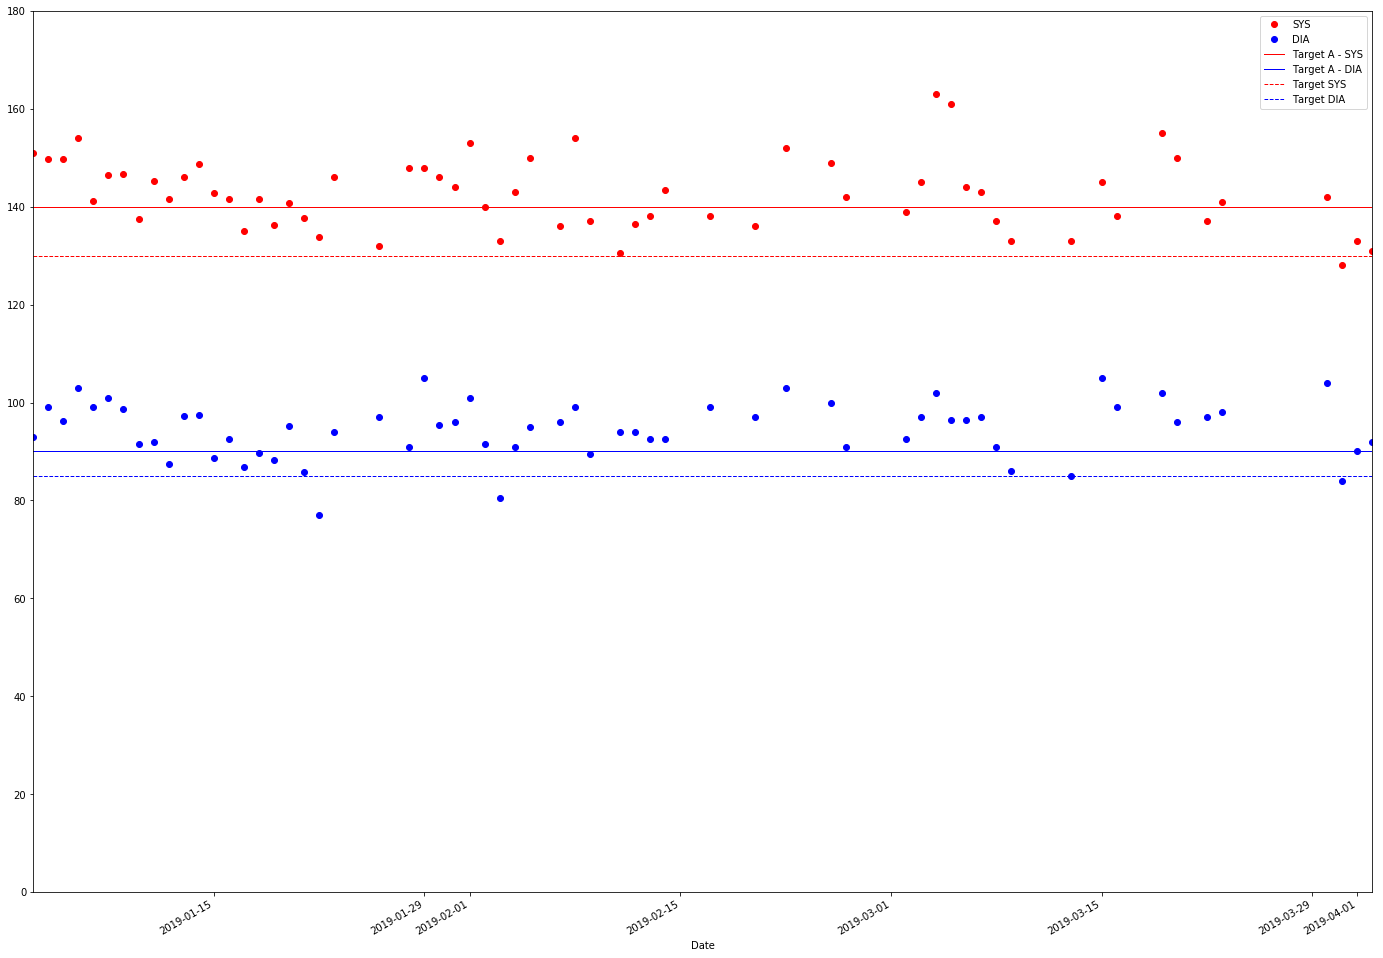

In [5]:
%matplotlib inline
bp.plot(figsize=(24,18), style=['ro ','bo ','r-','b-','r--','b--'], linewidth=1.0, ylim=(0,180))

# Trendlines

In [6]:
# This mdates thing can turn dates into numeric values, which is what we need to polyfit
import matplotlib.dates as mdates
bp['rawdate'] = mdates.date2num(bp.index)

bp.dropna(subset=["SYS"], inplace=True)

import numpy as np
# For 1-d degree curve fitting, polyfit returns good old y = mx + b values for each trend
sys_fit = np.polyfit(bp['rawdate'], bp['SYS'], 1)
dia_fit = np.polyfit(bp['rawdate'], bp['DIA'], 1)
bp['SYS Trend'] = bp['rawdate'] * sys_fit[0] + sys_fit[1]
bp['DIA Trend'] = bp['rawdate'] * dia_fit[0] + dia_fit[1]

# don't need this anymore
bp.drop("rawdate", axis=1, inplace=True)

bp.head()

,SYS,DIA,Target A - SYS,Target A - DIA,Target SYS,Target DIA,SYS Trend,DIA Trend
Date,,,,,,,,
2019-01-03,151.000000,93.00,140,90,130,85,144.608641,93.667941
2019-01-04,149.666667,99.00,140,90,130,85,144.556002,93.688075
2019-01-05,149.750000,96.25,140,90,130,85,144.503364,93.708208
2019-01-06,154.000000,103.00,140,90,130,85,144.450725,93.728342
2019-01-07,141.250000,99.00,140,90,130,85,144.398087,93.748476


# The Graphs

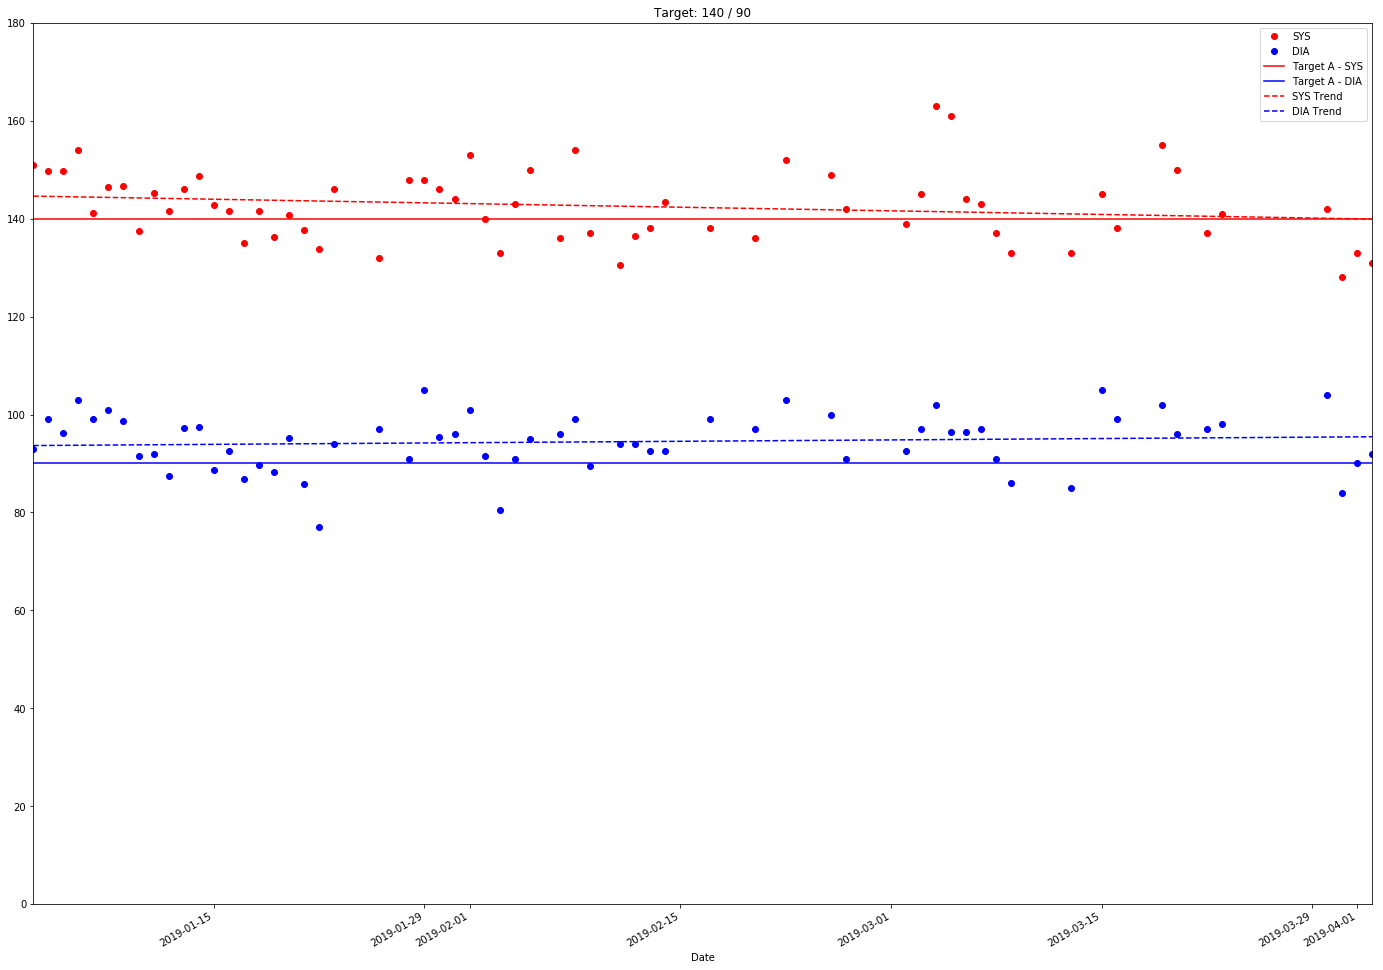

In [7]:
bp[['SYS','DIA', 'Target A - SYS', 'Target A - DIA', 'SYS Trend', 'DIA Trend']].plot(
    figsize=(24,18), style=['ro ','bo ','r-','b-','r--','b--'],
    ylim=(0,180),
    #xlim=(pd.Timestamp('2019-01-01'), pd.Timestamp('2019-03-15')),
    title='Target: 140 / 90')

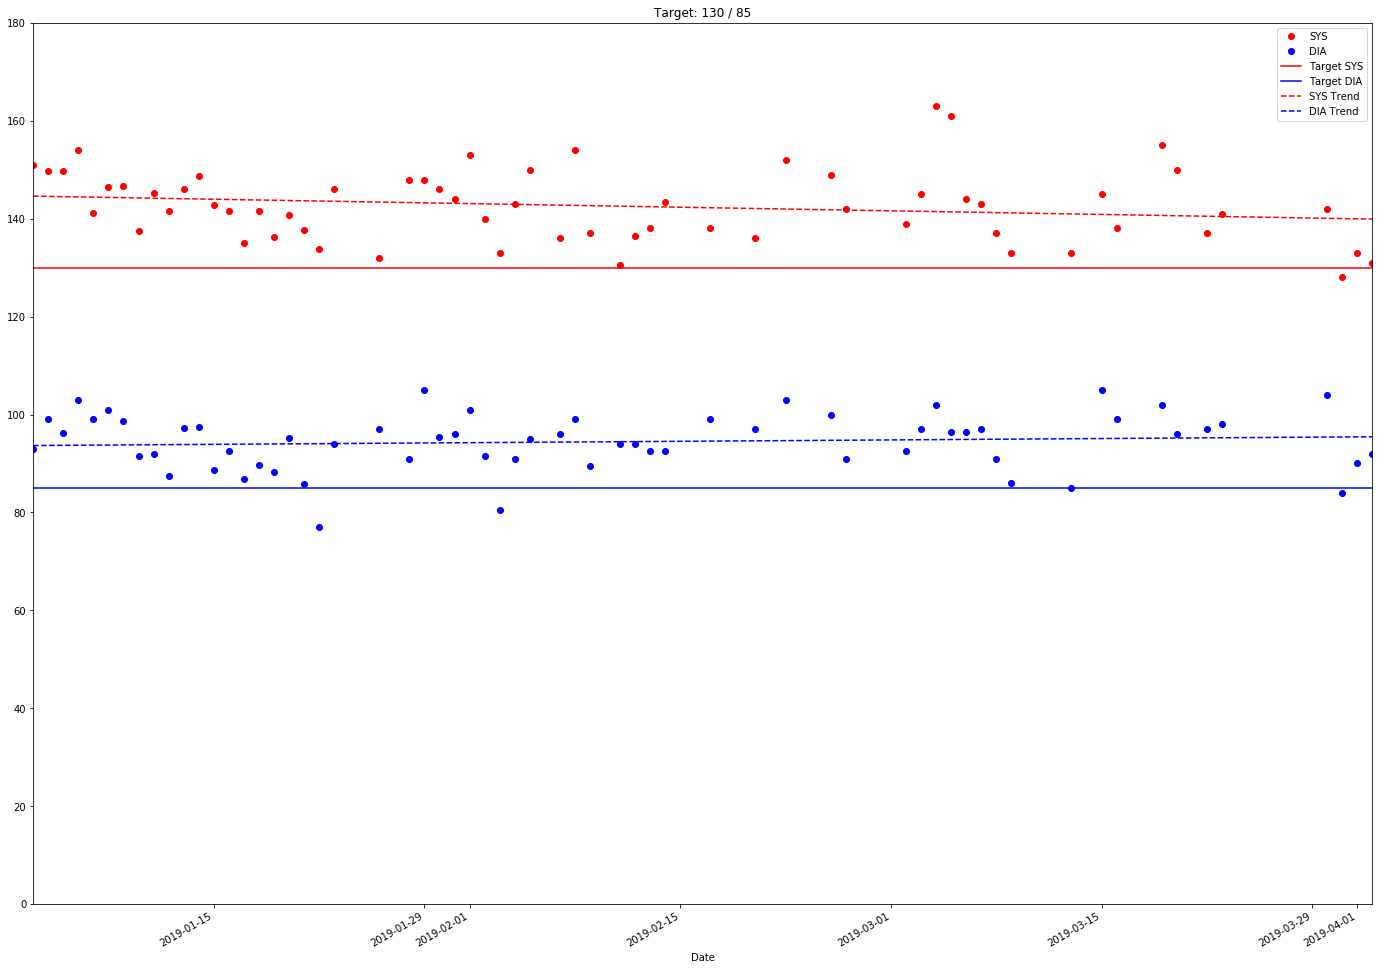

In [8]:
bp[['SYS','DIA', 'Target SYS', 'Target DIA', 'SYS Trend', 'DIA Trend']].plot(
    figsize=(24,18), style=['ro ','bo ','r-','b-','r--','b--'],
    ylim=(0,180),
    #xlim=(pd.Timestamp('2019-01-01'), pd.Timestamp('2019-03-15')),
    title='Target: 130 / 85')

In [9]:
bp['SYS'] = bp['SYS'].round(0)
bp['DIA'] = bp['DIA'].round(0)
bp[['SYS','DIA']]

,SYS,DIA
Date,,
2019-01-03,151.0,93.0
2019-01-04,150.0,99.0
2019-01-05,150.0,96.0
2019-01-06,154.0,103.0
2019-01-07,141.0,99.0
2019-01-08,146.0,101.0
2019-01-09,147.0,99.0
2019-01-10,138.0,92.0
2019-01-11,145.0,92.0
